## House Sell Prediction

In [1]:
# predict if the house will be sold within 3 months

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport
import warnings
warnings.filterwarnings('ignore')

In [3]:
# data is already prepared
df = pd.read_csv('Datasets/house_sell.csv', header=0)
print('rows:', df.shape[0], '| columns:', df.shape[1])
df.head()

rows: 506 | columns: 17


,price,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,Sold,avg_dist,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_River
0,24.0,32.31,0.538,6.575,65.2,24.7,4.98,5.480,11.19200,23,0.049347,0,4.0875,1,0,0,1
1,21.6,37.07,0.469,6.421,78.9,22.2,9.14,7.332,12.17280,42,0.046146,1,4.9675,0,1,0,0
2,34.7,37.07,0.469,7.185,61.1,22.2,4.03,7.394,46.19856,38,0.045764,0,4.9675,0,0,0,0
3,33.4,32.18,0.458,6.998,45.8,21.3,2.94,9.268,11.26720,45,0.047151,0,6.0650,1,1,0,0
4,36.2,32.18,0.458,7.147,54.2,21.3,5.33,8.824,11.28960,55,0.039474,0,6.0625,0,1,0,0


In [4]:
# profile = ProfileReport(df, title="Profiling Report", )
# profile

In [5]:
# checking for high correlation
corr = round(df.corr(), 3)
# air_qual is highly positively correlated with 3 others
corr[corr > 0.7]

,price,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,Sold,avg_dist,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_River
price,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
resid_area,NaN,1.000,0.764,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.708,NaN,NaN,NaN,NaN,NaN,NaN
air_qual,NaN,0.764,1.000,NaN,0.731,NaN,NaN,NaN,NaN,NaN,0.916,NaN,NaN,NaN,NaN,NaN,NaN
room_num,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,NaN,NaN,0.731,NaN,1.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
teachers,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
poor_prop,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
n_hos_beds,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
n_hot_rooms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rainfall,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# resid_area is highly negatively correlated with 4 others
corr[corr < -0.7]

,price,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,Sold,avg_dist,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_River
price,NaN,NaN,NaN,NaN,NaN,NaN,-0.741,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
resid_area,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.708,NaN,NaN,NaN,NaN
air_qual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.769,NaN,NaN,NaN,NaN
room_num,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.748,NaN,NaN,NaN,NaN
teachers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
poor_prop,-0.741,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
n_hos_beds,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
n_hot_rooms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rainfall,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.drop(columns=['air_qual', 'avg_dist'], inplace=True)

In [8]:
# resid_area is highly positively correlated with parks
corr = round(df.corr(), 3)
corr[corr > 0.7]

,price,resid_area,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,Sold,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_River
price,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
resid_area,NaN,1.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.708,NaN,NaN,NaN,NaN,NaN
room_num,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
teachers,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
poor_prop,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
n_hos_beds,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
n_hot_rooms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rainfall,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
parks,NaN,0.708,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000,NaN,NaN,NaN,NaN,NaN


In [9]:
corr['Sold']

price                      -0.155
resid_area                  0.024
room_num                    0.027
age                        -0.016
teachers                    0.043
poor_prop                  -0.083
n_hos_beds                  0.067
n_hot_rooms                -0.090
rainfall                   -0.040
parks                       0.005
Sold                        1.000
airport_YES                -0.070
waterbody_Lake             -0.061
waterbody_Lake and River   -0.003
waterbody_River             0.073
Name: Sold, dtype: float64

In [10]:
df.drop(columns=['parks'], inplace=True)
df.head()

,price,resid_area,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,Sold,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_River
0,24.0,32.31,6.575,65.2,24.7,4.98,5.480,11.19200,23,0,1,0,0,1
1,21.6,37.07,6.421,78.9,22.2,9.14,7.332,12.17280,42,1,0,1,0,0
2,34.7,37.07,7.185,61.1,22.2,4.03,7.394,46.19856,38,0,0,0,0,0
3,33.4,32.18,6.998,45.8,21.3,2.94,9.268,11.26720,45,0,1,1,0,0
4,36.2,32.18,7.147,54.2,21.3,5.33,8.824,11.28960,55,0,0,1,0,0


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X = df.drop(columns=['Sold'])
y = df['Sold']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape, sep='\n')

(404, 13)
(102, 13)


In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_train[0]

array([ 0.44572353, -0.70492455,  0.93567804,  0.69366877,  0.48463784,
       -0.41100022,  0.58265636, -0.59399794, -1.31368908, -1.10997486,
       -0.48525664, -0.40529635,  1.3293319 ])

### Simple Logistic Regression

In [15]:
# using sklearn library

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
X_ = df[['price']]
y_ = df['Sold']
logreg = LogisticRegression().fit(X_,y_)
print(logreg.intercept_)
print(logreg.coef_)

[0.61477516]
[[-0.03571865]]


In [18]:
# using statsmodel library

In [19]:
import statsmodels.api as sm
import statsmodels.discrete.discrete_model as smd

In [20]:
X_ = sm.add_constant(X_)
logreg_ = smd.Logit(y_,X_).fit()
print(logreg_.summary())

Optimization terminated successfully.
         Current function value: 0.676690
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                   Sold   No. Observations:                  506
Model:                          Logit   Df Residuals:                      504
Method:                           MLE   Df Model:                            1
Date:                Mon, 06 May 2024   Pseudo R-squ.:                 0.01788
Time:                        18:22:07   Log-Likelihood:                -342.41
converged:                       True   LL-Null:                       -348.64
Covariance Type:            nonrobust   LLR p-value:                 0.0004142
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6149      0.248      2.484      0.013       0.130       1.100
price         -0.0357      0.

#### Logistic Regression

In [21]:
# using statsmodel library

In [22]:
X_train_ = sm.add_constant(X_train)
lr_ = smd.Logit(y_train, X_train_).fit()
print(lr_.summary())

Optimization terminated successfully.
         Current function value: 0.580565
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                   Sold   No. Observations:                  404
Model:                          Logit   Df Residuals:                      390
Method:                           MLE   Df Model:                           13
Date:                Mon, 06 May 2024   Pseudo R-squ.:                  0.1586
Time:                        18:22:07   Log-Likelihood:                -234.55
converged:                       True   LL-Null:                       -278.76
Covariance Type:            nonrobust   LLR p-value:                 2.789e-13
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2615      0.115     -2.281      0.023      -0.486      -0.037
x1            -2.1340      0.

In [23]:
print(lr_.predict(sm.add_constant(X_test)[:5]))

[0.38666202 0.00360921 0.56550959 0.70072828 0.41471956]


In [24]:
# using sklearn library

In [25]:
lr = LogisticRegression().fit(X_train, y_train)
print('coef:', lr.coef_)
print('intercept:', lr.intercept_)

# boundary value set to 0.5 by default
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

coef: [[-1.87957742  0.10375067  0.60549146  0.20448558  0.38469268 -1.21097968
   0.39073203 -0.158922   -0.1261334  -0.04599765 -0.02268403  0.04646528
   0.20172241]]
intercept: [-0.24086321]


In [26]:
# boundary value set to 0.3
prob = lr.predict_proba(X_test)[:,1]
y_test_pred03 = [1 if i > 0.3 else 0 for i in prob]

#### confusion matrix

In [27]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [28]:
train_matrix = confusion_matrix(y_train, y_train_pred)
test_matrix = confusion_matrix(y_test, y_test_pred)
test_matrix03 = confusion_matrix(y_test, y_test_pred03)

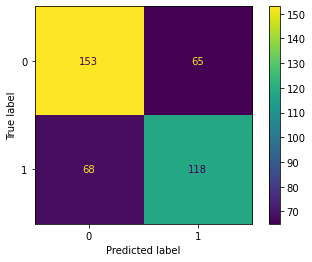

In [29]:
ConfusionMatrixDisplay(train_matrix).plot()
plt.show()

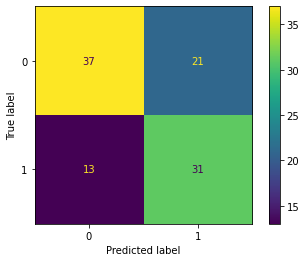

In [30]:
ConfusionMatrixDisplay(test_matrix).plot()
plt.show()

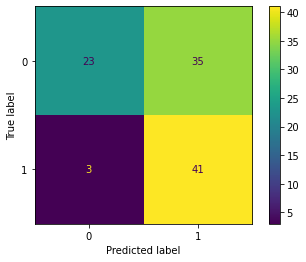

In [31]:
ConfusionMatrixDisplay(test_matrix03).plot()
plt.show()

#### Linear Discriminant Analysis

In [32]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [33]:
lda = LinearDiscriminantAnalysis().fit(X_train,y_train)

#### K Nearest Neighbours

In [34]:
from sklearn.neighbors import KNeighborsClassifier

In [35]:
knn = KNeighborsClassifier().fit(X_train, y_train)

In [36]:
from sklearn.model_selection import validation_curve

In [37]:
estimator = KNeighborsClassifier()
param_name = 'n_neighbors'
param_range = range(2,21,2)
train_scores, val_scores = validation_curve(estimator=estimator, 
                                            X=X_train, 
                                            y=y_train, 
                                            param_name=param_name, 
                                            param_range=param_range, 
                                            cv=5, 
                                            scoring='accuracy')

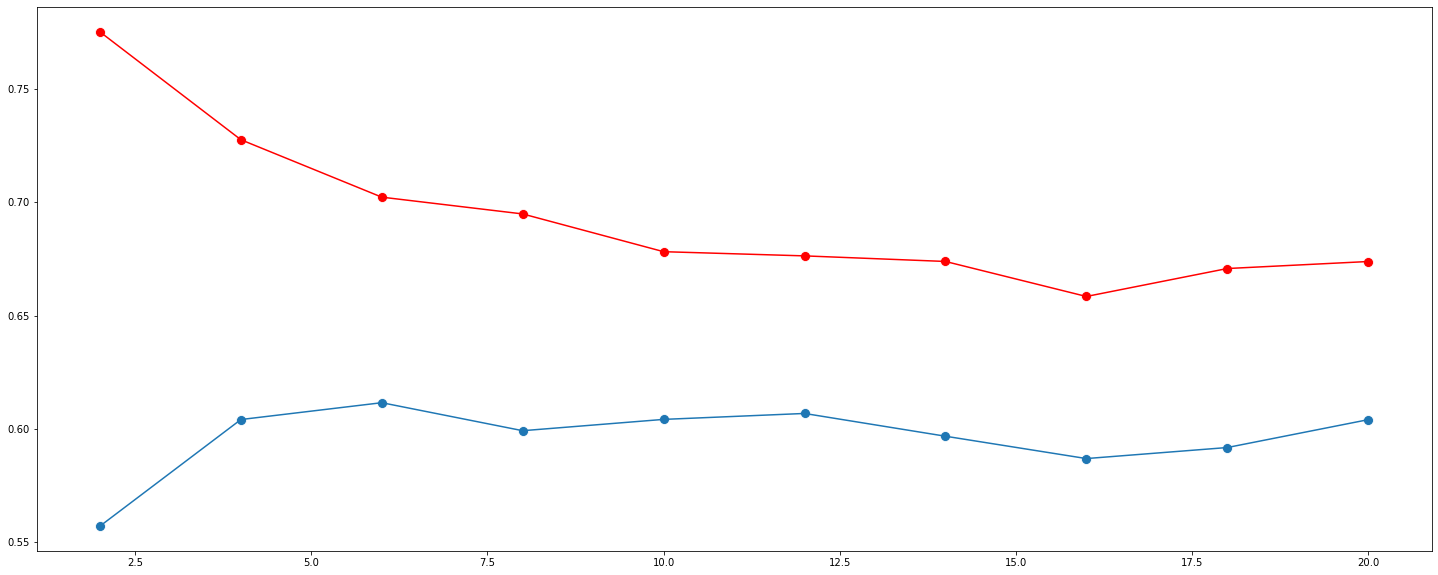

In [38]:
plt.figure(figsize=(25,10))
sns.scatterplot(x=param_range, y=val_scores.mean(axis=1), s=100)
sns.lineplot(x=param_range, y=val_scores.mean(axis=1))
sns.scatterplot(x=param_range, y=train_scores.mean(axis=1), s=100, color='red')
sns.lineplot(x=param_range, y=train_scores.mean(axis=1), color='red')
plt.show()

In [39]:
val_scores.mean(axis=1)

array([0.55694444, 0.60404321, 0.61148148, 0.59910494, 0.60410494,
       0.6067284 , 0.59666667, 0.58679012, 0.59166667, 0.60398148])

In [40]:
best_n = param_range[np.argmax(val_scores.mean(axis=1))]
print(best_n)

6


In [41]:
knn_ = KNeighborsClassifier(n_neighbors=best_n).fit(X_train, y_train)

In [42]:
from sklearn.metrics import accuracy_score

In [43]:
result = pd.DataFrame(columns=['model', 'accuracy_train', 'accuracy_test'])
models = {'Logistic Regression':lr, 'Linear Discriminant Analysis':lda, 
          'K-Nearest Neighbors':knn, 'K-Nearest Neighbors':knn_}

for key, value in models.items():
    train = round(accuracy_score(y_train, value.predict(X_train))*100, 2)
    test = round(accuracy_score(y_test, value.predict(X_test))*100, 2)
    
    scores = [key, train, test]
    series = pd.Series(scores, index=result.columns)
    result = result.append(series, ignore_index=True)

In [44]:
result

,model,accuracy_train,accuracy_test
0,Logistic Regression,67.08,66.67
1,Linear Discriminant Analysis,68.32,66.67
2,K-Nearest Neighbors,69.80,59.80
